# Lending Club Case Study

**Problem Statement**

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Step 1 - Importing Necessory Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

### Step 2 - Reading the Data

In [2]:
# Read the dataset

loan_data = pd.read_csv('loan.csv')

In [3]:
# Display the head of the dataset

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Setting Option to see all the columns

pd.set_option('display.max_columns', None)

In [5]:
# Display shape of the dataset

loan_data.shape

(39717, 111)

### Step 3 - Data Cleaning - Fixing Rows and Columns and Treating Missing Values

In [6]:
# Check for null values in a column

loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Remove column with all null values

loan_data.dropna( how="all", axis=1, inplace=True)

In [8]:
# Recheck the head of the dataframe again

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# Display shape of the data frame

loan_data.shape

(39717, 57)

In [10]:
# function that identifies a column with single values

def removeColumnIfSingleValue(columnName):
    if (~pd.isna(loan_data[columnName].unique())).sum() == 1:
        loan_data.drop(columnName, axis=1, inplace=True)
    return 0

In [11]:
# Drop columns with single values or NA values as they do to contribute to the analysis

for column in loan_data.columns.values:
    removeColumnIfSingleValue(column)

In [12]:
# Display info of the data frame

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
# Display shape of the data frame

loan_data.shape

(39717, 48)

In [14]:
# Since most of the values in mths_since_last_record is NA/0 , we can drop that column

loan_data.drop("mths_since_last_record", axis=1, inplace=True)

In [15]:
# Dropping url column as it does not contribute to the analysis. The loan id in the url is already available in the column id.

loan_data.drop("url", axis=1, inplace=True)

In [16]:
# Rows with loan_status = "Current" can be removed as it does not contribute to the analysis. Since the loan is still in progress we can't decide on the result as of now and can be removed for current analysis.

loan_data = loan_data[~(loan_data.loan_status == "Current")]

In [17]:
# Since all the ongoing loans are removed, next_pymnt_d has no significance and can be dropped

loan_data.drop("next_pymnt_d", axis=1, inplace=True)

In [18]:
# As 65% of the data in mths_since_last_delinq column is NA, it can't be used for analysis/conclusion, hence dropping it

loan_data.drop("mths_since_last_delinq", axis=1, inplace=True)

In [19]:
# Around 32% of the desc column is NA and also it can't be used for a concrete conclusions, hence dropping it

loan_data.drop("desc", axis=1, inplace=True)

In [20]:
# id and member_id are both unique values has no significance in predicting if the customer would default, hence dropping one of those and keeping other as primary key

loan_data.drop(["member_id"], axis=1, inplace=True)

In [21]:
# total_pymnt, total_pymnt_inv, last_pymnt_amnt, last_pymnt_d, total_rec_int, revol_bal, total_rec_prncp, recoveries, collection_recovery_fee, total_rec_late_fee, earliest_cr_line, last_credit_pull_d, last_pymnt_d, out_prncp_inv, out_prncp, delinq_2yrs columns are dropped as they are info related to post approval of loan which does not contribute to the current analysis

loan_data.drop(["total_pymnt", "total_pymnt_inv", "last_pymnt_amnt", "last_pymnt_d", "total_rec_int", "revol_bal", "total_rec_prncp", "recoveries", "collection_recovery_fee", "total_rec_late_fee", "earliest_cr_line", "last_credit_pull_d", "last_pymnt_d", "out_prncp_inv", "out_prncp", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "total_acc", "revol_util"], axis=1, inplace=True)

In [22]:
# title, emp_title columns has text values and high degree of unique values and does not be a factor in decsion making, hence dropping

loan_data.drop(["title", "emp_title"], axis=1, inplace=True)

In [23]:
# zip_code is a demographic data and does not play a significant role to analysis

loan_data.drop(["zip_code"], axis=1, inplace=True)

In [24]:
# Display shape of the data frame

loan_data.shape

(38577, 19)

In [25]:
# Display info of the data frame

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [26]:
# Check for percentage of missing values

loan_data.isnull().sum()/loan_data.shape[0] * 100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

### Step 4 - Data Cleaning - Since  Majority of the null values has been removed and now we can handle the remaining missing values - Standardising values

In [27]:
# Since 2.7% of emp_length is NaN and this variable might play a key role in analysing if the borrower have a steady employment status and be able to repay the loan. So better to remove missing values than imputing, which may alter the analysis

loan_data = loan_data[~(loan_data.emp_length.isna())]

In [28]:
# Only 1.8% of pub_rec_bankruptcies is NaN and mode of the column is 0 and around 95% od data has value 0, so imputing the rows with NaN with 0 is safe

loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.fillna(value=0)

In [29]:
# Display shape of the data frame

loan_data.shape

(37544, 19)

In [30]:
# Check for percentage of missing values

loan_data.isnull().sum()/loan_data.shape[0] * 100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Step 5 - Data Cleaning - Hence all the missing values are either Imputed or Removed, we can move to standardization of datas and adding derived columns

In [31]:
# Display info of the data frame

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   funded_amnt_inv       37544 non-null  float64
 4   term                  37544 non-null  object 
 5   int_rate              37544 non-null  object 
 6   installment           37544 non-null  float64
 7   grade                 37544 non-null  object 
 8   sub_grade             37544 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  issue_d               37544 non-null  object 
 14  loan_status           37544 non-null  object 
 15  purpose            

In [32]:
# int_rate can be converted to float values by removing the % sign and make it more appropriate for analysis

loan_data.int_rate = loan_data.int_rate.apply(lambda x : float(x.replace("%","")))

In [33]:
# Standardizing issue_d column to dateTime format

loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [34]:
# Convert emp_length column to numerical value which can be more easily analysed later

loan_data.emp_length = loan_data.emp_length.apply(lambda x : 0 if "<" in x else 10 if "+" in x else int(x[0]))

In [35]:
# Splitting issue_d into issue_month and issue_year for more easy analysis and removing issue_d

loan_data["issue_month"] = loan_data.issue_d.apply(lambda x : x.month)
loan_data["issue_year"] = loan_data.issue_d.apply(lambda x : x.year)

loan_data.drop("issue_d", axis=1, inplace=True)

In [36]:
# Ratio of funded_amnt_inv to annual_inc is added as a derived column inorder to check for the efficiency of the borrower to pay the amount back

loan_data["funded_to_income"] = loan_data.funded_amnt_inv / loan_data.annual_inc

In [37]:
# Display info of the data frame

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   funded_amnt_inv       37544 non-null  float64
 4   term                  37544 non-null  object 
 5   int_rate              37544 non-null  float64
 6   installment           37544 non-null  float64
 7   grade                 37544 non-null  object 
 8   sub_grade             37544 non-null  object 
 9   emp_length            37544 non-null  int64  
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  loan_status           37544 non-null  object 
 14  purpose               37544 non-null  object 
 15  addr_state         

### Step 6 - Data Cleaning - Fixing Outliers

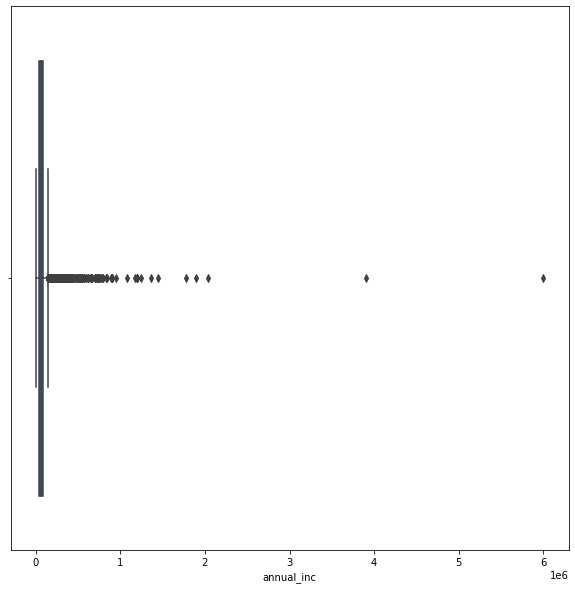

In [38]:
# annual_inc has high level of outliers, so better to remove few outliers inorder to refine the data.

plt.figure(figsize=(10,10))
sns.boxplot(loan_data.annual_inc)
plt.show()

In [39]:
loan_data.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [40]:
# Removing annual_inc outliers based on .95 quantile as it looks so detached from the rest of the data

loan_data = loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(0.95)]

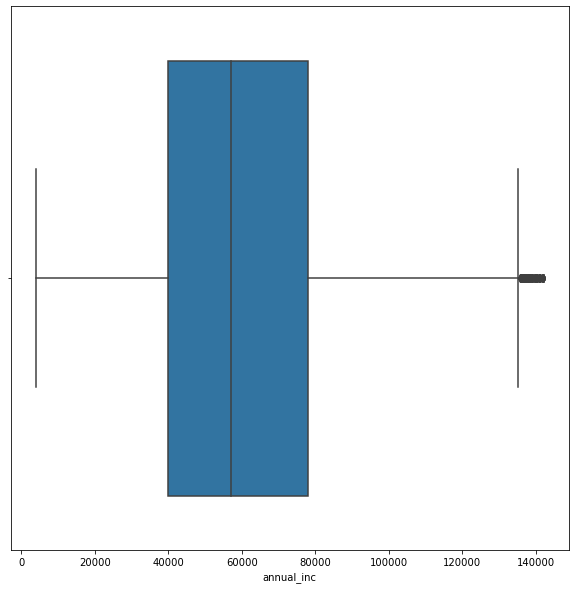

In [41]:
# Now after removal of outliers, annual_inc looks better

plt.figure(figsize=(10,10))
sns.boxplot(loan_data.annual_inc)
plt.show()

In [42]:
# Resetting Index

loan_data.reset_index(inplace=True)
loan_data.drop("index", axis=1, inplace=True)

### Once all the data cleaning steps are done, we can now focus into data analysis

In [43]:
# Displaying all the dataframe info again

loan_data.shape

(35675, 21)

In [44]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35675 entries, 0 to 35674
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35675 non-null  int64  
 1   loan_amnt             35675 non-null  int64  
 2   funded_amnt           35675 non-null  int64  
 3   funded_amnt_inv       35675 non-null  float64
 4   term                  35675 non-null  object 
 5   int_rate              35675 non-null  float64
 6   installment           35675 non-null  float64
 7   grade                 35675 non-null  object 
 8   sub_grade             35675 non-null  object 
 9   emp_length            35675 non-null  int64  
 10  home_ownership        35675 non-null  object 
 11  annual_inc            35675 non-null  float64
 12  verification_status   35675 non-null  object 
 13  loan_status           35675 non-null  object 
 14  purpose               35675 non-null  object 
 15  addr_state         

### Step 7 - Data Analysis - Univariate Analysis

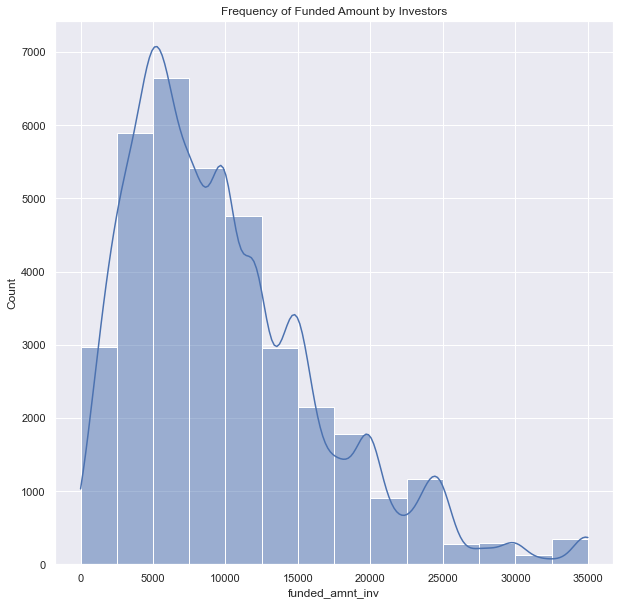

In [45]:
# Plotting a histogram for the funded_amnt_inv to get to know what is the most approved loan amount
sns.set(style="darkgrid")

# Resizing the graph
plt.figure(figsize=(10,10))

# Plotting hist plot with seaborn
sns.histplot(loan_data.funded_amnt_inv, kde=True, stat = "count", bins=14)

plt.title("Frequency of Funded Amount by Investors")
plt.show()

### 
- The above histogram indicates that **most of the funding** was between **2500 - 10000 range**.

### Univariate Analysis on categorical variables

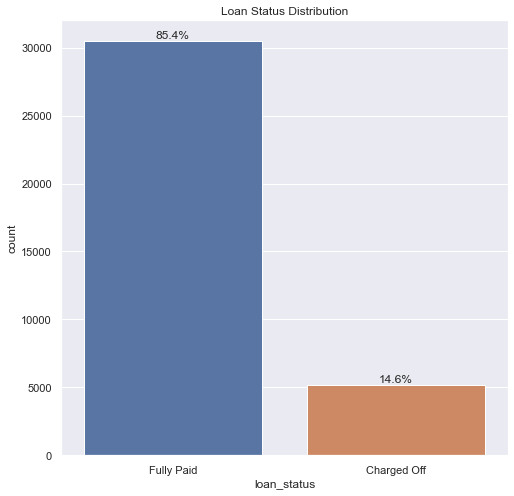

In [46]:
# Plotting a Count Plot for loan_status to get loan status distribution

# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting count plot with seaborn
ax = sns.countplot(loan_data.loan_status)

# Get the length of the dataframe
total = len(loan_data)

# Annotate percentage values
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title("Loan Status Distribution")
plt.show()

### 
- The above count plot indicates that **85.4%** of the loans approved was **Fully Paid** and a **14.6%** of loans was **defaulted**

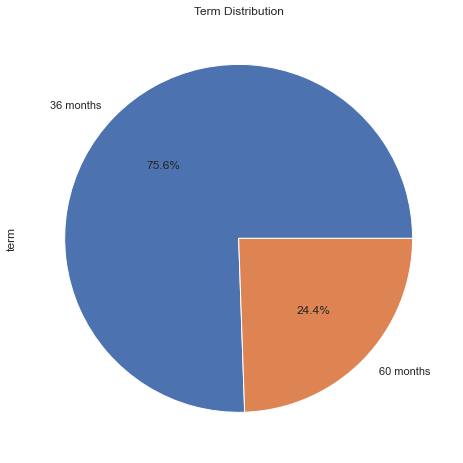

In [47]:
# Plotting a Pie Plot for term to understand the distribution


# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting Pie plot 
loan_data.term.value_counts().plot.pie(autopct='%1.1f%%')

plt.title("Term Distribution")
plt.show()

- The above pie chart shows that around **75.6%** of loans was taken under **36 months** term and **24.4%** under **60 months** term

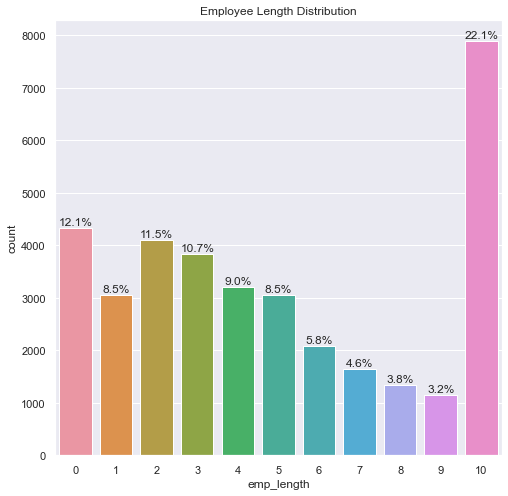

In [48]:
# Plotting a Count Plot for emp_length to get Employee Length Distribution 

# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting count plot with seaborn
ax = sns.countplot(loan_data.emp_length)

# Get the length of the dataframe
total = len(loan_data)

# Annotate percentage values
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title("Employee Length Distribution")
plt.show()

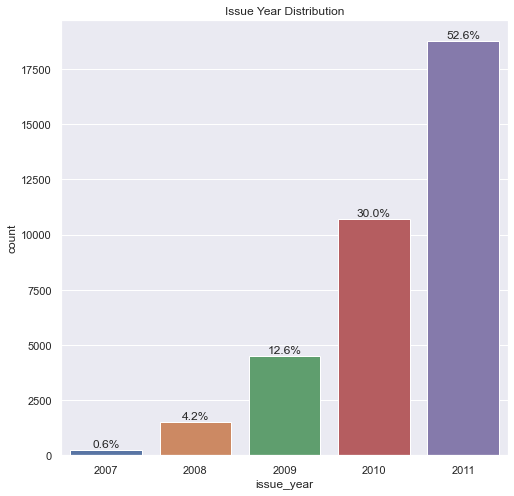

In [49]:
# Plotting a Count Plot for issue_year to get Issue Year Distribution 

# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting count plot with seaborn
ax = sns.countplot(loan_data.issue_year)

# Get the length of the dataframe
total = len(loan_data)

# Annotate percentage values
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title("Issue Year Distribution")
plt.show()

### Step 8 - Data Analysis - Segmented/Dervied Variable Univariate Analysis

Bins considered in Equal Width Binning method are :
0 - 10 (Low)
10 - 20 (Medium)
20 - 30 (High)


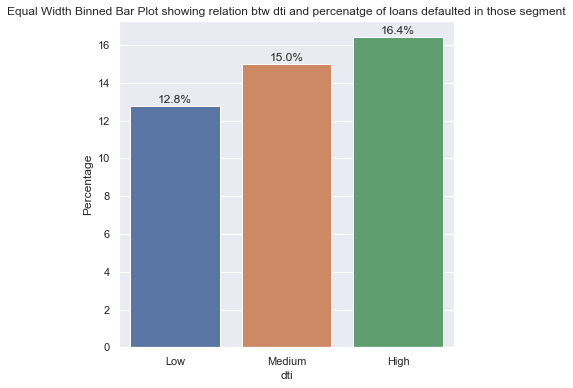

In [50]:
# Bucketing dti into 3 divisons using 2 methods, Quantile Binning and Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = loan_data.dti.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
dti_eq_width = pd.cut(loan_data.dti, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for dti_eq_width as index and loan_status as columns
pivot_dti_eq_width = pd.pivot_table(data=loan_data, index=dti_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_dti_eq_width ["Percentage"] = pivot_dti_eq_width["Charged Off"] / (pivot_dti_eq_width ["Fully Paid"] + pivot_dti_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_dti_eq_width, x=pivot_dti_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw dti and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()    

Bins considered in Equal Frequency Binning (Quantile Binning) are :
0.0 - 10.22 (Low)
10.22 - 16.89 (Medium)
16.89 - 29.99 (High)


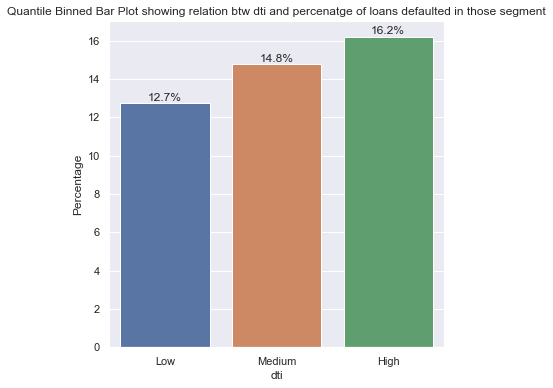

In [51]:
# Bucketing based on Equal Frequency Binning (Quantile Binning)

# Binning using qcut method in pandas
labels_ = ["Low", "Medium", "High"]
dti_quantile_cut, bins_ = pd.qcut(loan_data.dti, q=3, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for dti_quantile_cut as index and loan_status as columns
pivot_dti_quantile_cut = pd.pivot_table(data=loan_data, index=dti_quantile_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_dti_quantile_cut ["Percentage"] = pivot_dti_quantile_cut["Charged Off"] / (pivot_dti_quantile_cut ["Fully Paid"] + pivot_dti_quantile_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_dti_quantile_cut, x=pivot_dti_quantile_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw dti and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()    

- The above 2 plots indicating realtionship btw **dti and Percentage of defaulters in each segment**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns.
- From analysis of 2 binning method one can come to a conclusion that as the **dti increases chances of defaulting also increases**
- So lending out loans to **higher dti applications can be reduced**

Bins considered in Equal Width Binning method are :
0.00 - 0.26 (Low)
0.26 - 0.52 (Medium)
0.52 - 0.78 (High)


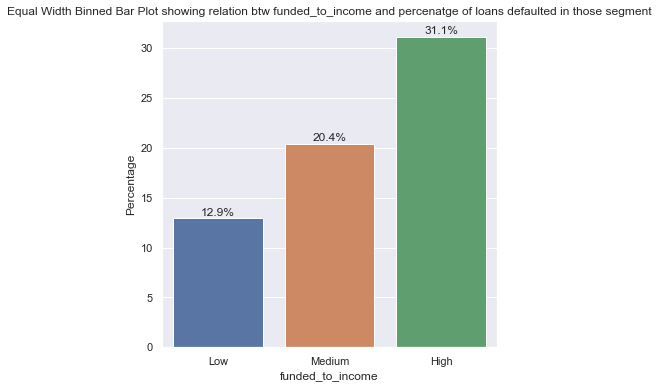

In [52]:
# Bucketing funded_to_income into 3 divisons using 2 methods, Quantile Binning and Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = loan_data.funded_to_income.max()/bin_number
bins_ = [(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0:.2f} - {1:.2f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
fti_eq_width = pd.cut(loan_data.funded_to_income, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for fti_eq_width as index and loan_status as columns
pivot_fti_eq_width = pd.pivot_table(data=loan_data, index=fti_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_fti_eq_width ["Percentage"] = pivot_fti_eq_width["Charged Off"] / (pivot_fti_eq_width ["Fully Paid"] + pivot_fti_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_fti_eq_width, x=pivot_fti_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw funded_to_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()  

Bins considered in Equal Frequency Binning (Quantile Binning) are :
0.00 - 0.11 (Low)
0.11 - 0.21 (Medium)
0.21 - 0.78 (High)


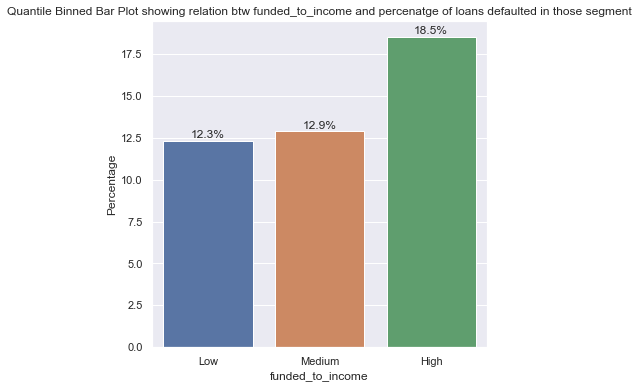

In [53]:
# Bucketing based on Equal Frequency Binning (Quantile Binning)

# Binning using qcut method in pandas
labels_ = ["Low", "Medium", "High"]
fti_quantile_cut, bins_ = pd.qcut(loan_data.funded_to_income, q=3, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0:.2f} - {1:.2f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for fti_quantile_cut as index and loan_status as columns
pivot_fti_quantile_cut = pd.pivot_table(data=loan_data, index=fti_quantile_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_fti_quantile_cut ["Percentage"] = pivot_fti_quantile_cut["Charged Off"] / (pivot_fti_quantile_cut ["Fully Paid"] + pivot_fti_quantile_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_fti_quantile_cut, x=pivot_fti_quantile_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw funded_to_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()  

- The above 2 plots indicating realtionship btw **funded_to_income and Percentage of defaulters in each segment**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns.
- From analysis of 2 binning method one can come to a conclusion that as the **funded_to_income increases chances of defaulting also increases**
- From plot generated using **Equal Width Binning**, its clear that almost **31.1%** of loans got defaulted whose funded_to_income ratio was above **0.52**
- So lending out loans to **higher funded_to_income ratio applications can be reduced**

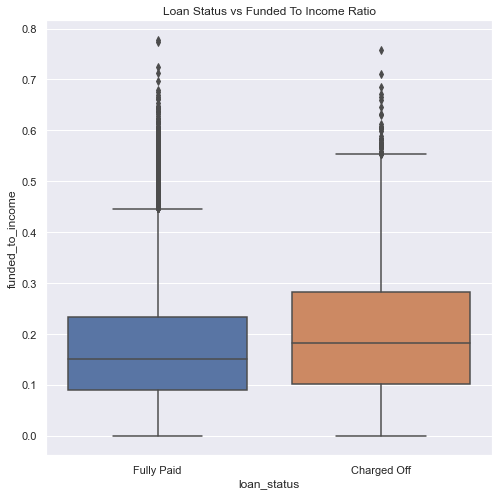

In [54]:
# Plotting a box plot of loan_status vs int_rate

# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting box plot with seaborn
sns.boxplot(loan_data.loan_status, loan_data.funded_to_income)
plt.title("Loan Status vs Funded To Income Ratio")
plt.show()

### Inferences from Univariate Analysis -
- Majority of the Loan Amount Requested/Sanctioned falls between **2500 - 10000** range.
- **85.4%** of the loans approved was Fully Paid and a 14.6% of loans was defaulted.
- Around **22%** of the total loan are taken by people who had 10+ Years of employee length, indicating that people tend to take loans more on a later stage of life.
- Term Distribution Pie chart shows that around **75.6%** of loans was taken under **36 months term** and **24.4%** under **60 months** term 
- The loan issued increases drastically year by year, **2011** has over **50%** of the all issued loans. This can be due to several reasons.
    1. Life Getting Tougher Over Years
    2. Recession in 2011
    3. LC became popular over years
    
1) **dti vs loan_status**
- From **dti vs Loan Status** analysis, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns, that as the **dti increases chances of defaulting also increases**

2) **funded_to_income vs loan_status**
- Similar analysis was made from realtionship btw **funded_to_income vs loan_status**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning**.
- From analysis of 2 binning method one can come to a conclusion that as the **funded_to_income increases chances of defaulting also increases**
- From plot generated using **Equal Width Binning** for **funded_to_income vs loan_status**, its clear that almost **31.1%** of loans got defaulted whose funded_to_income ratio was above **0.52**
- **Loan Status vs Funded To Income Ratio** Box plot gives a slight indication that most of the defaulters fall on high f_to_i ratio value, whereas majority of the Fully Paid are on the lower ratio end


### Step 9 - Data Analysis - Bivariate Analysis

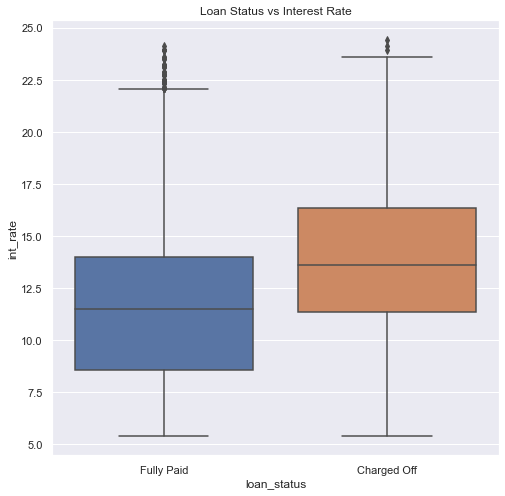

In [55]:
# Plotting a box plot of loan_status vs int_rate

# Resizing the graph
plt.figure(figsize=(8,8))

# Plotting box plot with seaborn
sns.boxplot(loan_data.loan_status, loan_data.int_rate)
plt.title("Loan Status vs Interest Rate")
plt.show()

- Plotting a box plot showing relation btw loan_status and int_rate

In [56]:
# Plotting a bar graph with the percentage of people defaulted across each grade category wrt to grade

# Creating a pivot table with grade and loan_status with count as aggfunc
grade_loan_pivot = pd.pivot_table(data=loan_data, index="grade", columns="loan_status", values="id", aggfunc="count")
grade_loan_pivot

loan_status,Charged Off,Fully Paid
grade,,
A,550,8726
B,1309,9492
C,1266,6058
D,1049,3687
E,645,1762
F,283,586
G,94,168


In [57]:
# Adding Percentage column to it and calculating percenatge of defaulters for each grade category

grade_loan_pivot ["Percentage"] = grade_loan_pivot["Charged Off"] / (grade_loan_pivot ["Fully Paid"] + grade_loan_pivot["Charged Off"]) * 100
grade_loan_pivot

loan_status,Charged Off,Fully Paid,Percentage
grade,,,
A,550,8726,5.929280
B,1309,9492,12.119248
C,1266,6058,17.285636
D,1049,3687,22.149493
E,645,1762,26.796843
F,283,586,32.566168
G,94,168,35.877863


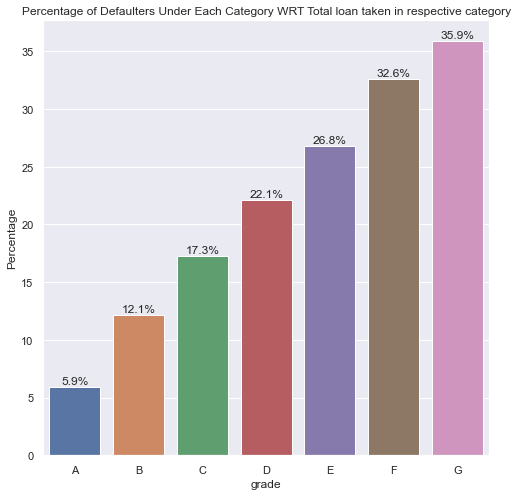

In [58]:
# Plotting barplot using seaborn

# Resizing the graph
plt.figure(figsize=(8,8))

ax = sns.barplot(data=grade_loan_pivot, x=grade_loan_pivot.index, y="Percentage")

# Annotate percentage values
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() 
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title("Percentage of Defaulters Under Each Category WRT Total loan taken in respective category")
plt.show()

- The above barplot gives a clear conclusion/insights that higher the grade at which the loans are taken, more the chance of defaulting. 
- Around **36%** of the loan takers under **G** category has defulated
- The above box plot of Loan Status vs Interest Rate also indicate the same, that higher the interest rates higher the chance of defaulting
- Grades and Interest Rate is closely linked, as the interest rate increases, grades increase and vice versa, indicating that Grades is a bucketed version of interest rate
- Hence from these 2 plots, we can conclude that the loan taken under high interest rate or grades are tend to defualt more than the others

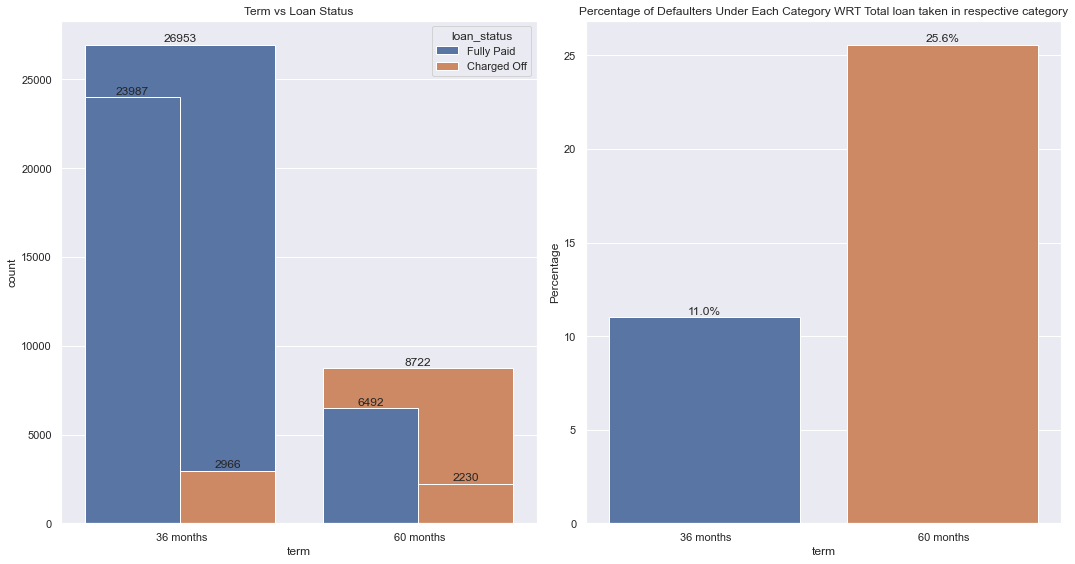

In [59]:
# Plotting count and bar plots for term vs loan_status

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Subplot 1 - Count Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(loan_data.term)
sns.countplot(loan_data.term, hue=loan_data.loan_status)
plt.title('Term vs Loan Status')

# Annotate count values
for p in ax.patches:
    count = f'{p.get_height()}\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='center')

# Creating Pivot table for term as index and loan_status as columns
term_loan_pivot = pd.pivot_table(data=loan_data, index="term", columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
term_loan_pivot ["Percentage"] = term_loan_pivot["Charged Off"] / (term_loan_pivot ["Fully Paid"] + term_loan_pivot["Charged Off"]) * 100
    
# Subplot 2 - Bar Plot
plt.subplot(1, 2, 2)
bx = sns.barplot(data=term_loan_pivot, x=term_loan_pivot.index, y="Percentage")
plt.title('Percentage of Defaulters Under Each Category WRT Total loan taken in respective category')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

- From count plot for **Term vs Loan Status**, its clear that out of **8722** who opted for **60 Months** as term **2230** has defaulted, means around **25.6 %**, where as for those opted **36 Months** only **2966** out of **26953** deafulted, thats just **11%**
- The **Percentage of Defaulters Under Each Category WRT Total loan taken in respective category** shows the same information with respect to percentage values in a barplot.
- This gives a clear indication that **people opted for longer duration installments are going to default more**, than people opted shorter duration
- So always insist on lending money for shorter duration

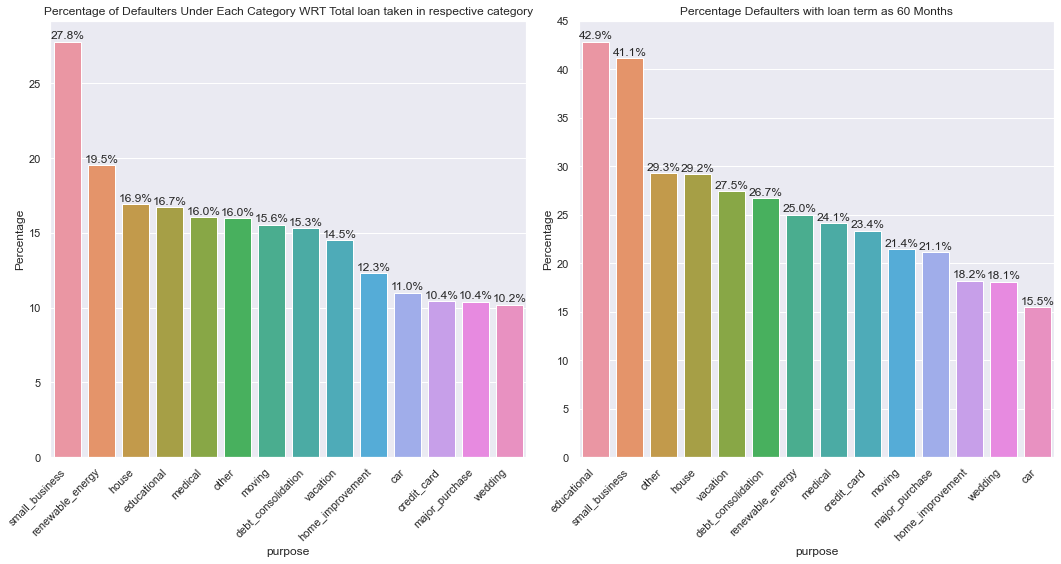

In [60]:
# Plotting multiple bar plots for finding relations btw loan_status and purpose of loan

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Creating Pivot table with purpose as index and loan_status as columns
purpose_loan_pivot = pd.pivot_table(data=loan_data, index="purpose", columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each purpose category wrt loan taken under each category
purpose_loan_pivot ["Percentage"] = purpose_loan_pivot["Charged Off"] / (purpose_loan_pivot ["Fully Paid"] + purpose_loan_pivot["Charged Off"]) * 100

# Sorting pivot table on Percentage 
purpose_loan_pivot.sort_values("Percentage", ascending=False, inplace=True)

# Subplot 1 - Bar Plot
plt.subplot(1, 2, 1)
ax = sns.barplot(data=purpose_loan_pivot, x=purpose_loan_pivot.index, y="Percentage")
plt.title('Percentage of Defaulters Under Each Category WRT Total loan taken in respective category')

# Rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotate count values
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Segmenting data with loans taken under 60 months term category 
term_60_data = loan_data[(loan_data.term == " 60 months")]
    
# Creating Pivot table for purpose as index and loan_status as columns for df with loans taken under 60 months term category
term_60_loan_pivot = pd.pivot_table(data=term_60_data, index="purpose", columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
term_60_loan_pivot ["Percentage"] = term_60_loan_pivot["Charged Off"] / (term_60_loan_pivot ["Fully Paid"] + term_60_loan_pivot["Charged Off"]) * 100
    
# Sorting pivot table on Percentage 
term_60_loan_pivot.sort_values("Percentage", ascending=False, inplace=True)

# Subplot 2 - Bar Plot
plt.subplot(1, 2, 2)
bx = sns.barplot(data=term_60_loan_pivot, x=term_60_loan_pivot.index, y="Percentage")
plt.title('Percentage Defaulters with loan term as 60 Months')

# Rotate x-axis tick labels
bx.set_xticklabels(bx.get_xticklabels(), rotation=45, ha='right')

# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

- The above analysis with **purpose vs loan_status** gives interesting insights.
- **27.8%** of loans taken for the purpose of **small_business** end up as defaulters. This might be because of the failure of the business
- Another insight is that for loans taken under **60 months as term** and purpose as **eductional** and **small_business** shows very high default rates of about **42%**  
- So lending loans for purposes such as **eductional** and **small_business** for longer terms of **60 months** have a very huge chance of defaulting
- There is another inference that, majority of loans taken for small_business, are taken under **high interest**, **G Grade**, and longer term **60 Months**, resulting in high chances of defaulting.

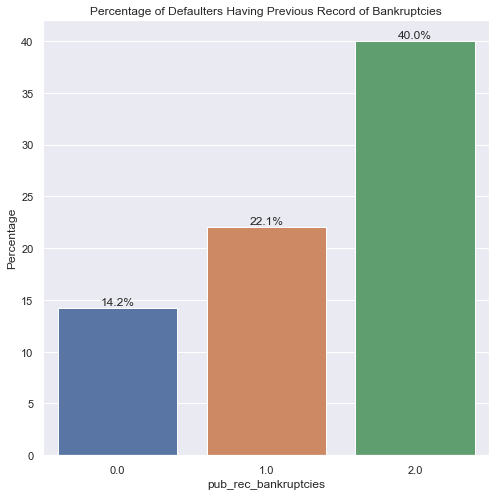

In [61]:
# Creating Pivot table for pub_rec_bankruptcies as index and loan_status as columns
bankruptcies_loan_pivot = pd.pivot_table(data=loan_data, index="pub_rec_bankruptcies", columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category
bankruptcies_loan_pivot ["Percentage"] = bankruptcies_loan_pivot["Charged Off"] / (bankruptcies_loan_pivot ["Fully Paid"] + bankruptcies_loan_pivot["Charged Off"]) * 100

# Resizing the graph
plt.figure(figsize=(8,8))

# Bar Plot with seaborn
bx = sns.barplot(data=bankruptcies_loan_pivot, x=bankruptcies_loan_pivot.index, y="Percentage")
plt.title('Percentage of Defaulters Having Previous Record of Bankruptcies')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()    

- The above barplot of **pub_rec_bankruptcies vs percentage of defaulters** shows a indication that, people having previous record of bankruptcies tend to repeat that again in future.
- **40%** of those who take loans with a history of bankruptcies of **2** are tend to default. 
- So its better not to provide loans for those having previous records of bankruptcies

Bins considered in Equal Frequency Binning (Quantile Binning) are :
4000 - 37000 (Very Low)
37000 - 50000 (Low)
50000 - 64661 (Medium)
64661 - 84996 (High)
84996 - 142000 (Very High)


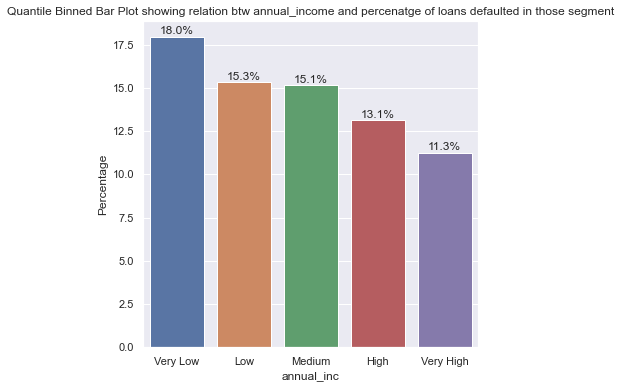

In [62]:
# Bucketing annual_inc into 5 divisons using Equal Frequency Binning (Quantile Binning) and plotting to see patterns

# Binning using qcut method in pandas
labels_ = ["Very Low", "Low", "Medium", "High", "Very High"]
annual_inc_q_cut, bins_ = pd.qcut(loan_data.annual_inc, q=5, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0:.0f} - {1:.0f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for annual_inc_q_cut as index and loan_status as columns
pivot_annual_inc_q_cut = pd.pivot_table(data=loan_data, index=annual_inc_q_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_annual_inc_q_cut ["Percentage"] = pivot_annual_inc_q_cut["Charged Off"] / (pivot_annual_inc_q_cut ["Fully Paid"] + pivot_annual_inc_q_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_annual_inc_q_cut, x=pivot_annual_inc_q_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw annual_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

- The above plot indicating realtionship btw annual_income and Percentage of defaulters in each segment, binned using Quantile Binning technique shows some interseting analysis.
- Most of the **defaulters lie on the lowest income range**
- There is a trend that as the **annual_inc decreases chances of defaulting increases**

Bins considered in Equal Width Binning method are :
0 - 7000 (Very Low)
7000 - 14000 (Low)
14000 - 21000 (Medium)
21000 - 28000 (High)
28000 - 35000 (Very High)


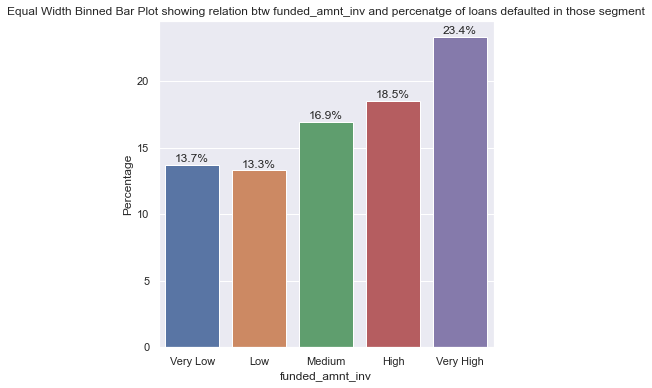

In [63]:
# Bucketing funded_amnt_inv into 5 divisons using Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 5
bin_increment = loan_data.funded_amnt_inv.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Very Low", "Low", "Medium", "High", "Very High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
funded_eq_width = pd.cut(loan_data.funded_amnt_inv, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for funded_amnt_inv as index and loan_status as columns
pivot_funded_eq_width = pd.pivot_table(data=loan_data, index=funded_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_funded_eq_width ["Percentage"] = pivot_funded_eq_width["Charged Off"] / (pivot_funded_eq_width ["Fully Paid"] + pivot_funded_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_funded_eq_width, x=pivot_funded_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw funded_amnt_inv and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()  

- The above plot indicating realtionship btw funded_amnt_inv and Percentage of defaulters in each segment, binned using Equal Width Binning technique shows some interseting analysis.
- Most of the **High Funded loans are the one most tend to default** 
- There is a trend that as the **funded amount by investors increases chances of defaulting increases**

Bins considered in Equal Width Binning method are :
0 - 10825 (Low)
10825 - 21650 (Medium)
21650 - 32475 (High)


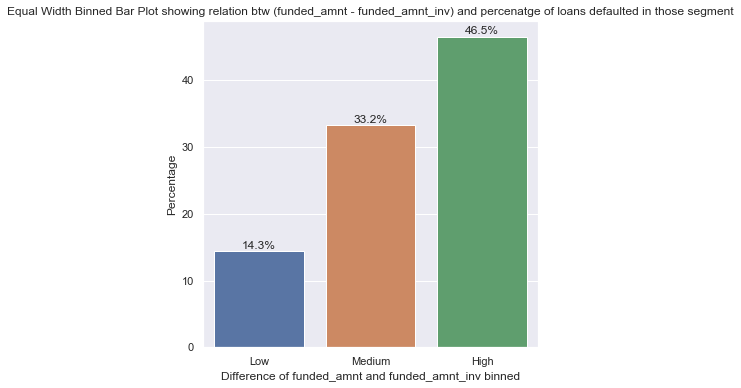

In [64]:
# Bucketing (funded_amnt - funded_amnt_inv) - into 3 divisons using Equal Width Binning and plotting to see patterns

# Getting the difference of funded_amnt and funded_amnt_inv, inorder to see if any patters are there btw the approved and delivered loan amounts 
diff = loan_data.funded_amnt - loan_data.funded_amnt_inv

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = diff.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
diff_eq_width = pd.cut(diff, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for diff as index and loan_status as columns
pivot_diff_eq_width = pd.pivot_table(data=loan_data, index=diff_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_diff_eq_width ["Percentage"] = pivot_diff_eq_width["Charged Off"] / (pivot_diff_eq_width ["Fully Paid"] + pivot_diff_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_diff_eq_width, x=pivot_diff_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw (funded_amnt - funded_amnt_inv) and percenatge of loans defaulted in those segment')
plt.xlabel("Difference of funded_amnt and funded_amnt_inv binned")    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

- The above plot indicating realtionship btw the difference of funded_amnt and funded_amnt_inv, and Percentage of defaulters in each segment, binned using Equal Width Binning technique shows very interseting analysis.
- So if the difference btw **approved amount from LC and amount funded by investors** increases, means the tendency for that loan to deafult is very high
- For loans which had a difference in **approved amount from LC and amount funded by investors** greater than **21.6K**, around **46.5%** of such loans was defaulted

### Inferences from Bivariate Analysis -

1) **Loan Status vs Interest Rate**
- **Loan Status vs Interest Rate** Box plot gives a strong indication that most of the defaulters tend to fall on higher interest rates when compared to non defaulters  
- The **Percentage of Defaulters Under Each Category WRT Grade** barplot gives a clear conclusion/insights that higher the grade at which the loans are taken, more the chance of defaulting. 
- Around **36%** of the loan takers under **G** category has defulated
- Grade/Sub Grade is linked to Interest rate, Higher the grade higher the interest rate

2) **term vs loan_status**
- People opted for longer duration installments i.e. **60 months** are going to default more, than people opted shorter duration i.e. **36 months**
- From **Term vs Loan Status** Analysis, its clear that out of **8722** who opted for **60 Months** as term **2230** has defaulted, means around **25.6 %**, where as for those opted **36 Months** only **2966** out of **26953** deafulted, thats just **11%**

3) **purpose vs loan_status**
- From **Purpose vs Loan_status** analysis, its clear that **27.8%** of loans taken for the purpose of **small_business** end up as defaulters. This might be because of the failure of the business.
- Another insight is that for loans taken under **60 months as term** and purpose as **eductional** and **small_business** shows very high default rates of about **42%**  

4) **annual_inc vs loan_status**
- From **Annual Income vs Loan Status** analysis, it was found that as **annual_inc decreases chances of defaulting increases**

5) **funded_amnt_inv vs loan_status**
- From **Funded_amnt_inv vs loan_status** analysis, it was found that as  **funded amount by investors increases chances of defaulting increases**

6) **pub_rec_bankruptcies vs percentage of defaulters**
- **pub_rec_bankruptcies vs percentage of defaulters** shows a indication that, people having previous record of bankruptcies tend to repeat that again in future.
- Around **40%** of those who take loans with a history of bankruptcies of **2** are tend to default. 

7) **difference of funded_amnt and funded_amnt_inv vs loan_status**
- Analysising realtionship btw the **difference of funded_amnt and funded_amnt_inv**, and Percentage of defaulters in each segment, binned using Equal Width Binning technique shows very interseting analysis.
- So if the difference btw **approved amount from LC and amount funded by investors** increases, means the tendency for that loan to deafult is very high
- For loans which had a difference in **approved amount from LC and amount funded by investors** greater than **21.6K**, around **46.5%** of such loans was defaulted
